In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('311.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_24408\856832564.py:1: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('311.csv')


In [3]:
df['open_dt'] = pd.to_datetime(df['open_dt'])
df['closed_dt'] = pd.to_datetime(df['closed_dt'])
df = df[df['closed_dt'] >= df['open_dt']]

df['resolution_time'] = df['closed_dt'] - df['open_dt']

In [4]:
group_to_reasons = {
    'Public Works and Infrastructure': ['Street Lights', 'Highway Maintenance', 'Street Cleaning', 'Graffiti', 
                                        'Enforcement & Abandoned Vehicles', 'Trees', 'Park Maintenance & Safety', 
                                        'Abandoned Bicycle', 'Traffic Management & Engineering', 'Cemetery', 
                                        'Bridge Maintenance', 'Catchbasin', 'Water Issues', 'Fire Hydrant', 
                                        'Sidewalk Cover / Manhole', 'Pothole'],
    'Sanitation and Environmental Services': ['Sanitation', 'Recycling', 'Environmental Services', 'Air Pollution Control'],
    'Urban Maintenance and Safety': ['Signs & Signals', 'Building', 'Housing', 'Weights and Measures', 
                                     'Code Enforcement', 'Valet', 'Parking Complaints', 'Fire Department', 
                                     'Neighborhood Services Issues', 'Generic Noise Disturbance', 'Noise Disturbance'],
    'Administrative and General Services': ['Notification', 'Employee & General Comments', 'Administrative & General Requests', 
                                            'Operations', 'Office of The Parking Clerk', 'Programs', 'Billing', 
                                            'MBTA', 'General Request', 'Administrative', 'Disability', 
                                            'Consumer Affairs Issues', 'Call Center Intake', 'Boston Bikes'],
    'Health and Public Safety': ['Health', 'Animal Issues', 'Needle Program'],
    'Community and Cultural Services': ['Volunteer & Corporate Groups', 'Alert Boston', 'Current Events', 
                                        'Massport', 'Hero Square Sign'],
    'Testing': ['Test Cases']
}

In [5]:
df['reason'].unique()

array(['Street Lights', 'Sanitation', 'Signs & Signals',
       'Highway Maintenance', 'Notification', 'Street Cleaning',
       'Recycling', 'Environmental Services', 'Building',
       'Employee & General Comments', 'Enforcement & Abandoned Vehicles',
       'Housing', 'Trees', 'Health', 'Weights and Measures', 'Graffiti',
       'Park Maintenance & Safety', 'Abandoned Bicycle',
       'Administrative & General Requests', 'Operations',
       'Traffic Management & Engineering', 'Cemetery',
       'Office of The Parking Clerk', 'Volunteer & Corporate Groups',
       'Code Enforcement', 'Bridge Maintenance', 'Valet', 'Alert Boston',
       'Parking Complaints', 'Current Events', 'Programs', 'Catchbasin',
       'Water Issues', 'Fire Hydrant', 'Sidewalk Cover / Manhole',
       'Billing', 'Pothole', 'General Request', 'MBTA', 'Fire Department',
       'Animal Issues', 'Generic Noise Disturbance',
       'Air Pollution Control', 'Noise Disturbance',
       'Neighborhood Services Issues',

In [6]:
df['reason_group'] = df['reason'].apply(lambda x: [k for k, v in group_to_reasons.items() if x in v][0])

In [20]:
# convert resolution time to seconds
df['resolution_time'] = df['resolution_time'].apply(lambda x: x.total_seconds())

In [22]:
average_resolution_times = df.groupby('reason_group')['resolution_time'].mean().sort_values(ascending=False)

In [24]:
def convert_from_seconds(sec, to = 'days'):
    match to:
        case 'months':
            return sec / 60 / 60 / 24 / 30
        case 'days':
            return sec / 60 / 60 / 24
        case 'hours':
            return sec / 60 / 60
        case 'minutes':
            return sec / 60
        case 'seconds':
            return sec
        case _:
            raise ValueError(f'Unknown unit {to}')

In [29]:
# groupby neighborhood and hue by reason group
df['neighborhood'] = df['neighborhood'].fillna('Unknown')
df[df.neighborhood == ' '] = 'Unknown'

by_neighborhood = df.groupby(['neighborhood', 'reason_group'])['case_enquiry_id'].count().reset_index()
by_neighborhood

,neighborhood,reason_group,case_enquiry_id
0,Allston,Administrative and General Services,127
1,Allston,Health and Public Safety,228
2,Allston,Public Works and Infrastructure,3414
3,Allston,Sanitation and Environmental Services,842
4,Allston,Urban Maintenance and Safety,1361
...,...,...,...
127,West Roxbury,Community and Cultural Services,3
128,West Roxbury,Health and Public Safety,1342
129,West Roxbury,Public Works and Infrastructure,50949
130,West Roxbury,Sanitation and Environmental Services,35809


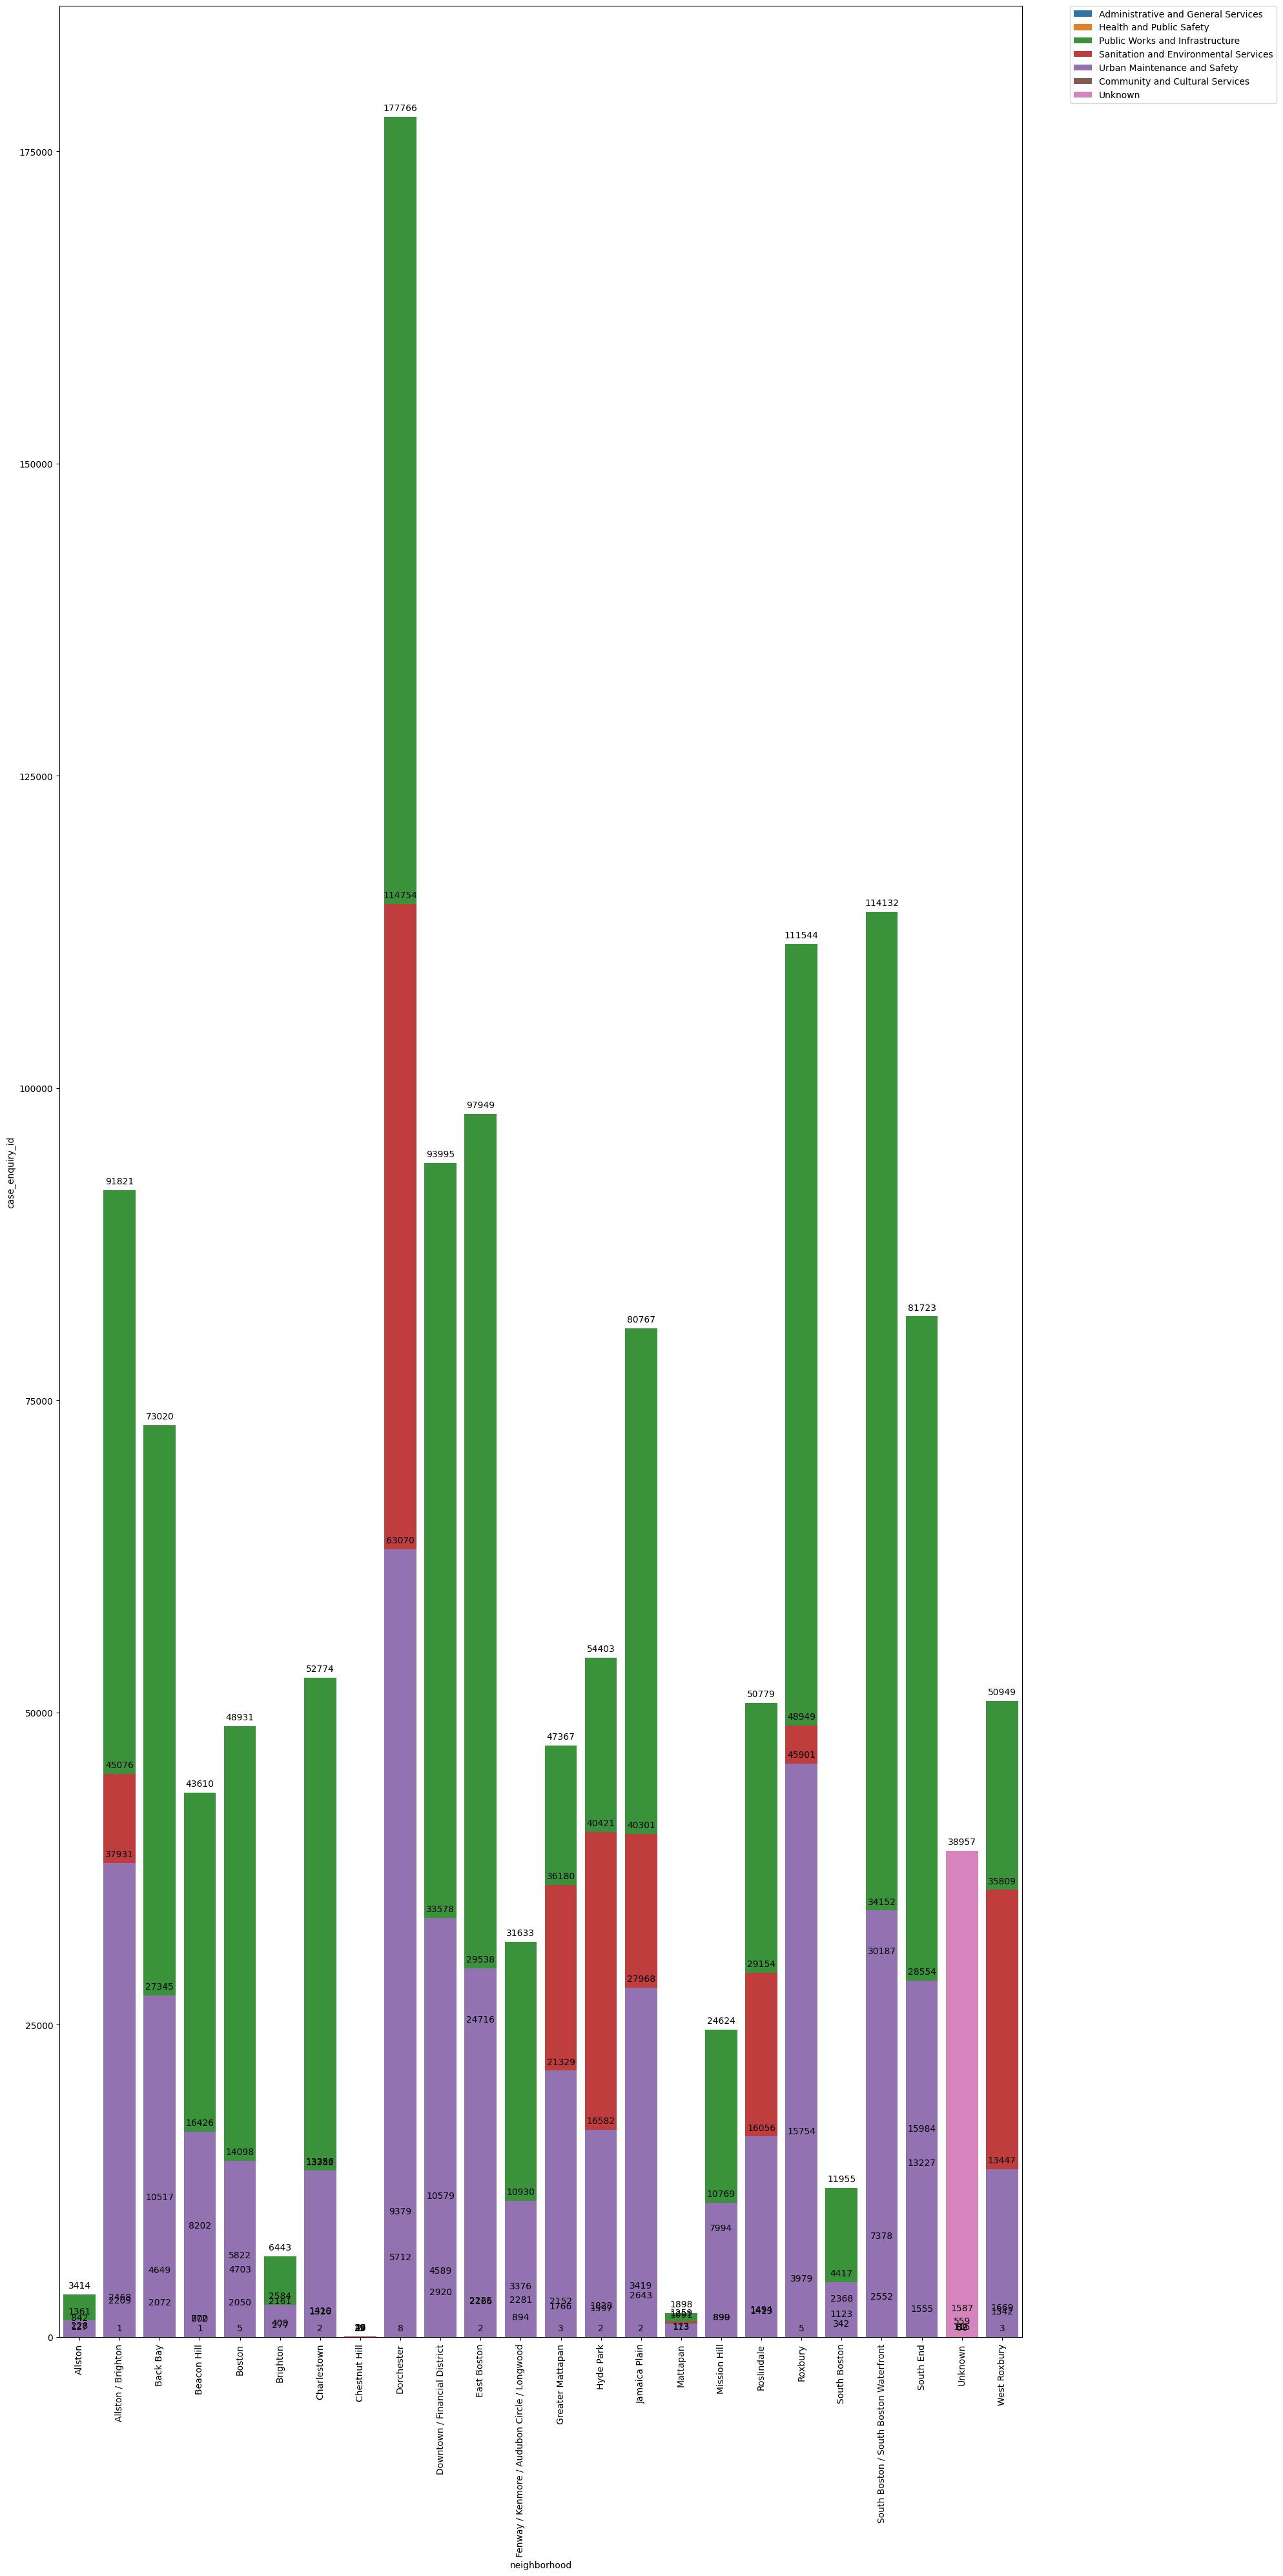

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 40))
fig = sns.barplot(data=by_neighborhood, x='neighborhood', y='case_enquiry_id', hue='reason_group', dodge=False)
# rotate x labels
# legend on right side
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

# annotate bar labels
for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points')
    
plt.tight_layout()
plt.show()